# Prosper Loans and Outcome Stauts
## By Ahmed Tarek

## Investigation Overview

> At the end of this presentation, we would be able to understand the factors that affects the final outcome status of a prosper loan either qualitatively or quantatively 

## Dataset Overview

> The data set originally has  113,937 observations with 81 vairables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

> In this Presentation we'll come across variables as ('ProsperScore','LoanOriginalAmount','LP_CustomerPrincipalPayments'
,'StatedMonthlyIncome', 'ProsperRating (Alpha)','LoanStatus')

### What makes a loan completed

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df=pd.read_csv("loan_tidy.csv");


In [3]:
# define our functions and constatns 
def plot_encoder(data,x,y,marker,spec_col):
    dummy=data[data[spec_col]==marker[0]]
    plt.scatter(data=dummy,x=x,y=y,marker=marker[1],alpha=0.5);
    plt.xlabel(x)
    plt.ylabel(y)

status_marker=[['Completed','o'],
              ['Defaulted','^']]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Loan status and Prosper ratings

> as your propser rating improves, your loan status gets a higher chances of being completed 

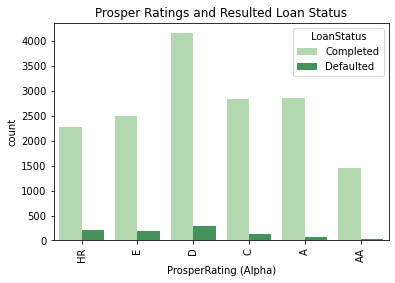

In [4]:
ordinal_var = [ 'HR', 'E', 'D', 'C','A', 'AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var);
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ordered_var);


sb.countplot(data = df, x = 'ProsperRating (Alpha)', hue = 'LoanStatus', palette = 'Greens')
plt.xticks(rotation=90)
plt.title("Prosper Ratings and Resulted Loan Status")
## interstingly emplyed people have a very big demand on the 60 months term which is interesting 
plt.show()

### But what if we don't have a good rating, how to be away from the defaulted group

### Loan status based on the monthly income and the loan amount 
>Loans are most likely to completed if "LoanOriginalAmount < 15k" and "monthlyIncome> 10k". 

> On the other hand, it is to be defaulted if "LoanOriginalAmount > 15k"
 

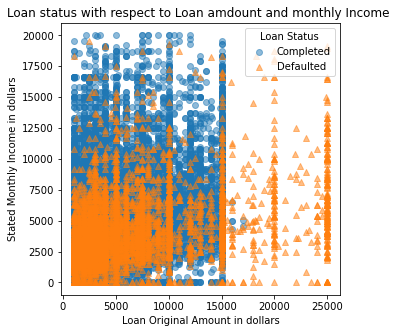

In [5]:
plt.figure(figsize=[5, 5])
for i in range(len(status_marker)):
    plot_encoder(df,'LoanOriginalAmount','StatedMonthlyIncome',status_marker[i],'LoanStatus');

plt.legend(['Completed','Defaulted'],title='Loan Status');
plt.title("Loan status with respect to Loan amdount and monthly Income ");
plt.xlabel('Loan Original Amount in dollars');
plt.ylabel('Stated Monthly Income in dollars');

### Does that mean that no one can take a loan greater that 15 k?
fortunately, No but how comes


### Loan status as a result of loan amount vs customer prinicpal payments
for a loan to not be defaulted, The customer has to have a principal payment approximately greater than the loan amount by a thousand dollars


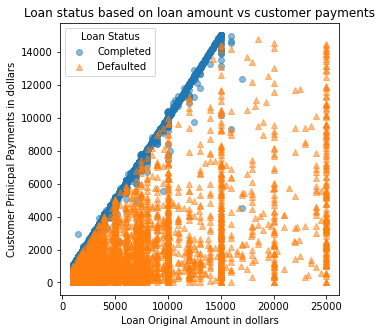

In [6]:
plt.figure(figsize=[5, 5])
for i in range(len(status_marker)):
    plot_encoder(df,'LoanOriginalAmount','LP_CustomerPrincipalPayments',status_marker[i],'LoanStatus')

plt.legend(['Completed','Defaulted'],title='Loan Status')
plt.xlabel('Loan Original Amount in dollars');
plt.ylabel('Customer Prinicpal Payments in dollars');
plt.title("Loan status based on loan amount vs customer payments")
plt.show();

### Hence make sure your prinicpal payments is greater than or equal to the amount of loan you want to request by a thousand dollar

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert presentation.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!